**Supervised - Score Student - Regression**

In [1]:
# import all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### import dataset

In [2]:
# read the dataset using pandas
data = pd.read_csv('/content/student_scores.csv')

In [3]:
# This displays the top 5 rows of the data
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Exploratory Data Analysis

In [4]:
# Provides some information regarding the columns in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# this describes the basic stat behind the dataset used
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x600 with 0 Axes>

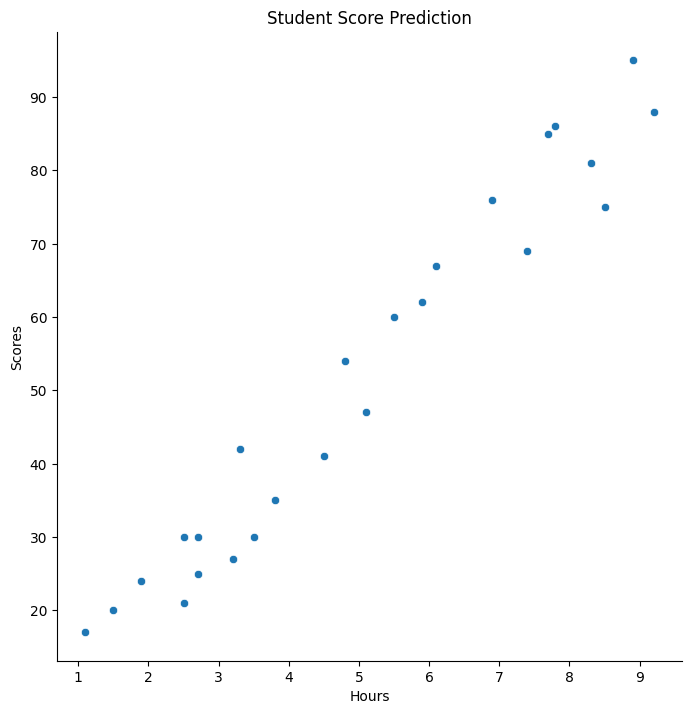

In [14]:
# These Plots help to explain the values and how they are scattered

plt.figure(figsize=(12,6))
sns.pairplot(data,x_vars=['Hours'],y_vars=['Scores'],size=7,kind='scatter')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Student Score Prediction')
plt.show()

### Feature Engineering
1. Check Duplicated Data
2. Check Missing Value Handling
3. Outlier Analysis
4. Encoding categorical : change string (categorical) into numerical -> in this dataset, there are no categorical data.

### Investigate of Feature Engineering

In [7]:
df = data.copy()

In [8]:
#Check Duplicated Data
print("Data Sebelum Pemeriksaan Duplikat:")
print(df.shape)

Data Sebelum Pemeriksaan Duplikat:
(25, 2)


In [9]:
duplicate_rows_before = df[df.duplicated()]
duplicate_rows_before

,Hours,Scores


In [10]:
df = df.drop_duplicates()

In [11]:
print("\nData Setelah Pemeriksaan Duplikat:")
print(df.shape)


Data Setelah Pemeriksaan Duplikat:
(25, 2)


In [12]:
#Check missing value
df.isna().sum()

,0
Hours,0
Scores,0


### There is no missing value

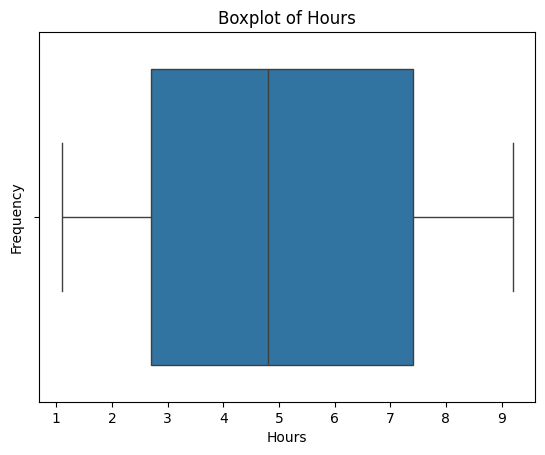

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Outlier Analysis
sns.boxplot(x="Hours", data=df)

# Menambahkan label sumbu dan judul
plt.xlabel("Hours")
plt.ylabel("Frequency")
plt.title("Boxplot of Hours")

# Menampilkan plot
plt.show()

### There's no outlier value
### There are no problems in investigate Feature Engineering, next we are doing machine learning modelling and splitting data into X_train, X_test -> Predictor, y_train, y_test -> target variables. If there are problems in investigate feature engineering then doing splitting data and process feature engineering handling.

### Splitting the data

In [18]:
# Hours data
X = data['Hours']
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [20]:
# Scores data
y = data['Scores']
y.head()

,Scores
0,21
1,47
2,27
3,75
4,30


In [21]:
# Import machine learning data from scikit learn
from sklearn.model_selection import train_test_split

In [22]:
# Split the data for train and test
# train : test = 75 : 25 atau 80 : 20 atau 70:30 atau 85:15
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=42)

**Linear Regression**

In [23]:
# Importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression

In [24]:
# Create new axis for x column in array
import numpy as np
# Convert X_train and X_test to NumPy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# Add new axis to the end
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

In [25]:
#array
X_train

array([[5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [30]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

In [26]:
y_train

,Scores
1,47
22,35
5,20
2,27
12,41
15,95
3,75
4,30
20,30
17,24


In [27]:
# Fitting the model using Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [28]:
# Predicting the Salary for the Test values
y_pred = lr_model.predict(X_test)

In [29]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

In [31]:
y_pred

array([83.10733229, 26.76559757, 26.76559757, 69.50760322, 59.79351103,
       28.70841601, 34.53687133])

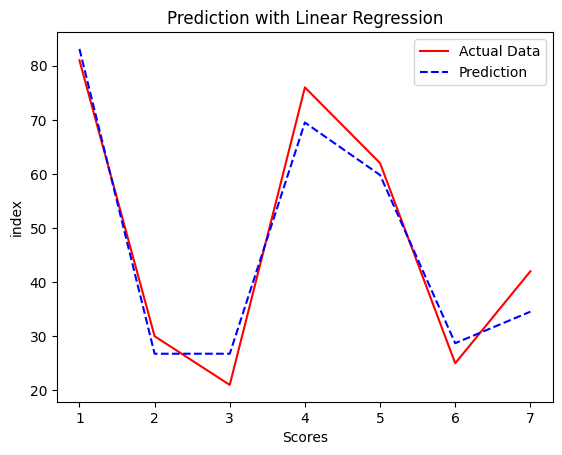

In [32]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Scores')
plt.ylabel('index')
plt.title('Prediction with Linear Regression')
plt.legend()
plt.show()

In [33]:
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error

In [34]:
# Calculate R square vale
rsq = r2_score(y_test,y_pred)

In [35]:
print('r square Linear Regression:',rsq)

r square Linear Regression: 0.9553509219739938


In [36]:
# Intecept and coeff of the line
print('Intercept of the Linear Regression model:',lr_model.intercept_)
print('Coefficient of the line Linear Regression:',lr_model.coef_)

Intercept of the Linear Regression model: 2.4803670915057623
Coefficient of the line Linear Regression: [9.71409219]


![](http://)Then it is said to form a line with result in Linear Regression
# y = 2.480367 + 9.71409 x
with x is the value of year experience work

**Decision Tree Regressor**
Using another Machine Learning Model :
1. Decision Tree
2. Random Forest

In [38]:
from sklearn.tree import DecisionTreeRegressor

In [39]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [40]:
# Predicting the Salary for the Test values
y_pred_dt = dt_model.predict(X_test)

In [41]:
y_pred_dt

array([75., 30., 30., 69., 67., 30., 27.])

In [44]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

In [45]:
y_test

,Scores
8,81
16,30
0,21
23,76
11,62
9,25
13,42


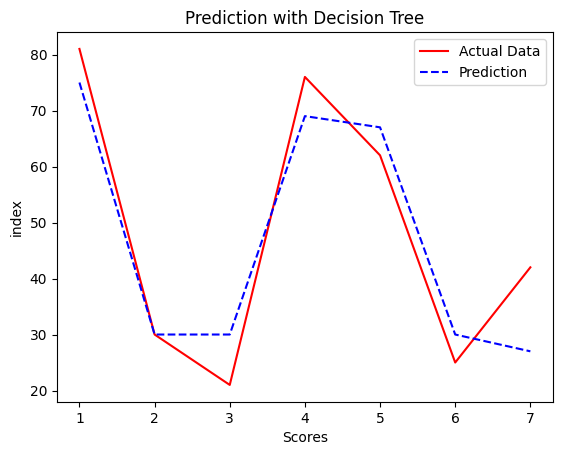

In [46]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_dt,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Scores')
plt.ylabel('index')
plt.title('Prediction with Decision Tree')
plt.legend()
plt.show()

In [47]:
# Calculate R square vale
rsq_dt = r2_score(y_test,y_pred_dt)

In [48]:
print('r square Decision Tree Results:',rsq_dt)

r square Decision Tree Results: 0.8803859268443893


### Using Random Forest

In [59]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train,y_train)

RandomForestRegressor()

In [60]:
# Predicting the Salary for the Test values
y_pred_rf = model_rf.predict(X_test)

In [61]:
y_pred_rf

array([79.51, 27.79, 27.79, 72.31, 63.41, 29.31, 28.77])

In [62]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

In [63]:
y_test

,Scores
8,81
16,30
0,21
23,76
11,62
9,25
13,42


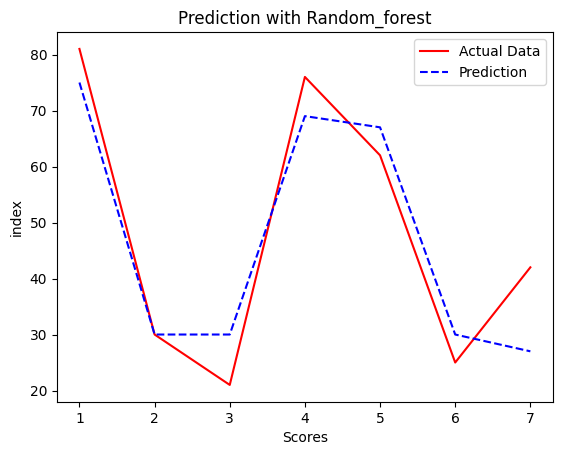

In [68]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_dt,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Scores')
plt.ylabel('index')
plt.title('Prediction with Random_forest')
plt.legend()
plt.show()

In [69]:
# Calculate R square vale
rsq_rf = r2_score(y_test,y_pred_rf)

In [71]:
print('r square Random Forest Results:',rsq_rf)

r square Random Forest Results: 0.9288224387786733


### Kesimpulan

Model yang Diuji:

- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor

Metrik Evaluasi:
- R² Score


Berdasarkan hasil evaluasi, Linear Regresion memberikan performa terbaik dengan r square Linear Regression: 0.9553509219739938. Meskipun Random Forest Regressor mendekati, Linear Regression unggul karena lebih sederhana, cepat, dan memberikan interpretasi yang jelas terkait hubungan antara variabel independen dan dependen.